In [ ]:
# Step 1: Import all necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 5

# Update this path to wherever your 'dataset' folder is inside Drive
DATASET_PATH = '/content/drive/MyDrive/MajorProject_2025/dataset'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'val'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 811 images belonging to 5 classes.
Found 219 images belonging to 5 classes.


In [ ]:
# Step 4: Load a pre-trained model (MobileNetV2) and build our custom classifier on top
# MobileNetV2 is a lightweight CNN model trained on ImageNet

# Load MobileNetV2 without its top layers, and use ImageNet weights
base_model = MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the convolutional base so it won't update during training

# Build the custom model
model = models.Sequential([
    base_model,                              # Base feature extractor
    layers.GlobalAveragePooling2D(),         # Convert feature maps into a single 1D vector per image
    layers.Dense(128, activation='relu'),    # Fully connected layer with ReLU activation
    layers.Dropout(0.3),                     # Dropout to prevent overfitting
    layers.Dense(NUM_CLASSES, activation='softmax')  # Final layer with softmax to get class probabilities
])

# Compile the model with optimizer, loss function and evaluation metric
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Suitable for multi-class classification
              metrics=['accuracy'])             # Track accuracy during training

# Display the model architecture
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Step 5: Train the model
EPOCHS = 20  # Number of times the model will see the entire dataset

# Train using training and validation generators
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.8218 - loss: 0.5054 - val_accuracy: 0.6210 - val_loss: 1.1437
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 130s 4s/step - accuracy: 0.8391 - loss: 0.4611 - val_accuracy: 0.5982 - val_loss: 1.1401
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 94s 4s/step - accuracy: 0.8066 - loss: 0.4892 - val_accuracy: 0.6393 - val_loss: 1.0954
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 92s 4s/step - accuracy: 0.8342 - loss: 0.4552 - val_accuracy: 0.6484 - val_loss: 1.0930
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.8529 - loss: 0.4236 - val_accuracy: 0.6073 - val_loss: 1.0841
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.8290 - loss: 0.4726 - val_accuracy: 0.6393 - val_loss: 1.1864
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 101s 4s/step - accuracy: 0.8654 - loss: 0.3753 - val_accuracy: 0.6210 - val_loss: 1.1364
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.8633 - loss: 0.4182 - val_accuracy: 0.6347 - val_l

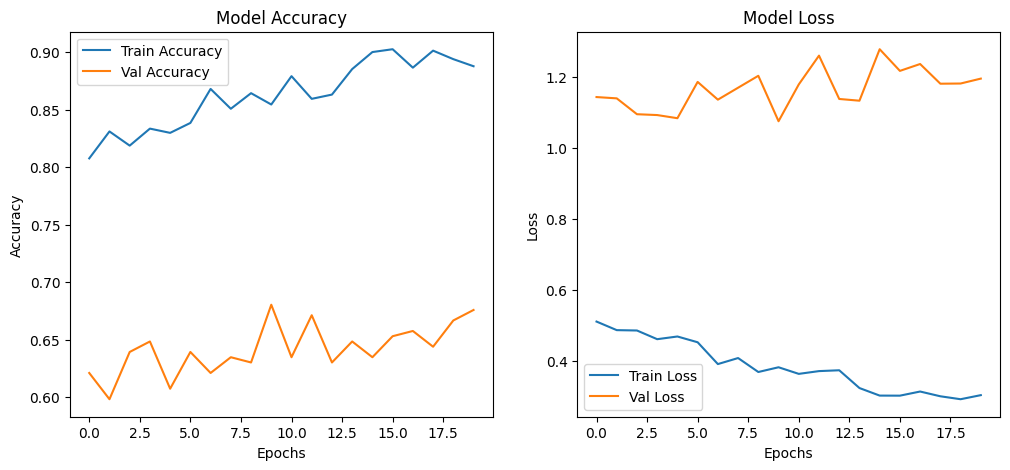

In [ ]:
# Step 6: Plot training and validation accuracy and loss over time
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step
Classification Report:

              precision    recall  f1-score   support

   BrownRust       0.70      0.59      0.64        32
     Healthy       0.55      0.81      0.66        26
      Mildew       0.72      0.44      0.55        41
    Septoria       0.77      0.82      0.79        73
  Yellowrust       0.59      0.64      0.61        47

    accuracy                           0.68       219
   macro avg       0.67      0.66      0.65       219
weighted avg       0.69      0.68      0.67       219



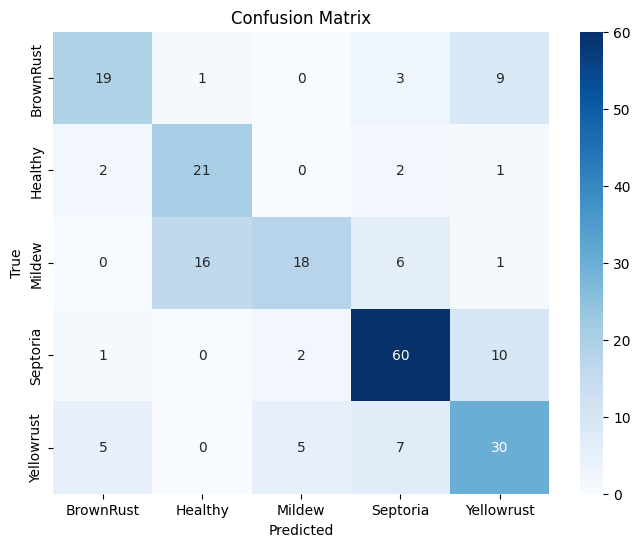

In [ ]:
# Step 7: Evaluate performance on validation data

# Reset generator to ensure correct order
val_generator.reset()

# Make predictions on validation set
preds = model.predict(val_generator)

# Convert softmax outputs to class labels
predicted_classes = np.argmax(preds, axis=1)

# Get actual class labels
true_classes = val_generator.classes

# Get class label names
class_labels = list(val_generator.class_indices.keys())

# Print classification report (precision, recall, F1-score)
print("Classification Report:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Generate and plot confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Saving Healthy2146.png to Healthy2146.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


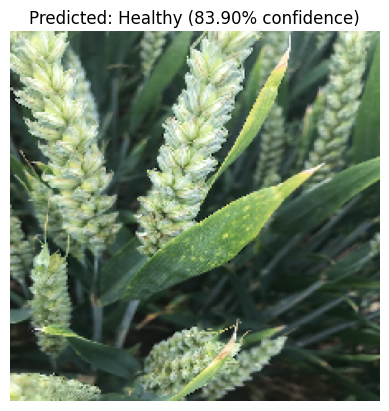

('Healthy', np.float32(83.89719))

In [ ]:
# Step 1: Upload an image
from google.colab import files
uploaded = files.upload()

# Step 2: Extract the filename of uploaded image
filename = list(uploaded.keys())[0]

# Step 3: Define the class names and prediction function
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Define image size (should match your training)
IMG_SIZE = (224, 224)

# Your class labels
class_names = ['BrownRust', 'Healthy', 'Mildew', 'Septoria', 'YellowRust']

def predict_image(img_path, model):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    confidence = prediction[0][predicted_index] * 100

    # Show result
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}% confidence)")
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

# Step 4: Use the function to predict the uploaded image
predict_image(filename, model)


In [ ]:
# Save the model to your Google Drive
model.save('/content/drive/MyDrive/MajorProject_2025/wheat_disease_model.keras')